<a href="https://colab.research.google.com/github/ddenebb/estructures_Dataframe/blob/main/Tasca_M9_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Take any English text you want, and calculate the frequency of its words.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#images_dir = '/content/gdrive/My Drive/Images'

Mounted at /content/drive


In [11]:
from collections import Counter

path='/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 9/Data/Barcelona-Madrid.txt'

# open the text file and read its contents
with open(path, "r") as f:
    text = f.read()

# convert text to lowercase to treat uppercase and lowercase words as the same
text_lower = text.lower()

# split the text into individual words
words = text_lower.split()

# use Counter to count the frequency of each word
word_counts = Counter(words)

# print the results
for word, count in word_counts.items():
    print(word, count)


amazing 1
customer 1
service. 1
love 1
it. 2
good 1
price.not 1
bad. 1
not 11
an 4
issue. 1
buggy. 1
happy. 1
user-friendly. 1
good. 1
quick 2
turn-around. 1
to 12
fail. 1
inexpensive. 1
cheap. 1
expensive. 1
bad 1
quality. 1
hate 2
great. 2
gives 1
me 2
complete 1
visibility 2
on 6
the 17
status 2
of 6
projects. 1
you 3
can 3
add 3
comments 1
for 4
every 1
subitem 1
and 10
files 1
them 2
is 8
i 8
really 2
like 3
layout 1
it 2
quite 1
intuitive. 1
everyone 2
has 2
create 3
account 2
in 2
my 3
organization 1
a 4
license 1
. 1
would 1
could 3
give 1
non-members, 1
even 2
if 2
they 3
edit 1
but 1
at 2
least 2
so 2
that 5
see 1
dashboards. 1
also 3
when 2
we 2
work 3
projects 2
with 1
external 1
organizations 1
it'd 1
be 1
great 1
have 1
possibility 1
giving 1
access 1
dashboards 1
without 1
need 1
or 3
purchasing 1
licenses. 1
using 1
monday 1
very 1
convenient 1
keeping 1
eye 1
one's 2
workflow 1
more 1
shared: 1
basic 1
ease 1
schematisation 1
allows 1
one 4
low-level 1
boards 3
right 1

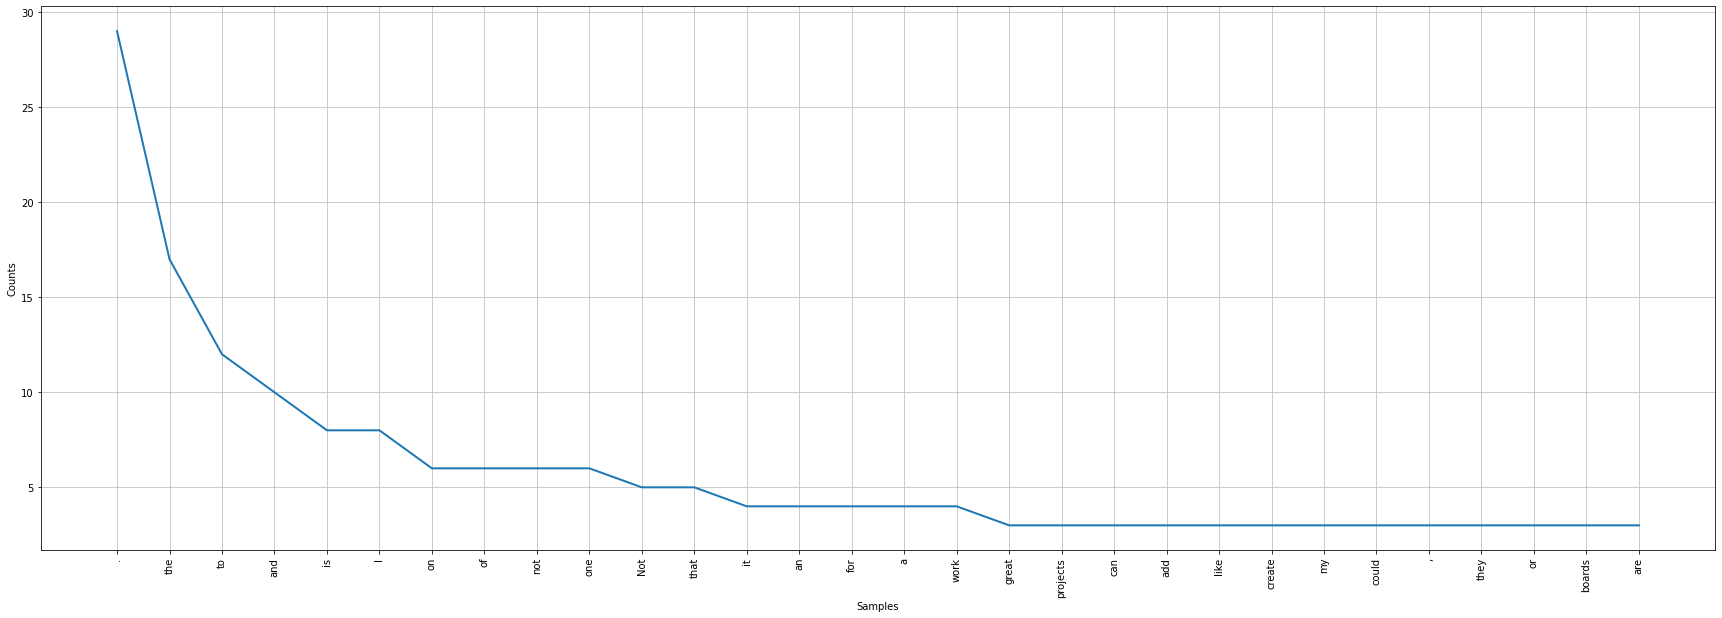

In [12]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

tokens = word_tokenize(text)
freq_dist = nltk.FreqDist(tokens)

plt.figure(figsize=(30, 10))
freq_dist.plot(30, cumulative=False)
plt.show()

# Exercise 2

Remove the stopwords and perform stemming on your dataset.
We will need to convert the text data from the .txt file to a pandas DataFrame before performing preprocessing steps like removing stopwords and stemming.

The next cell will load the text data from a .txt file into a pandas DataFrame:

In [13]:
import pandas as pd

# Load the text data from the .txt file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 9/Data/Barcelona-Madrid.txt', sep='\t', names=['text'])

# Print the first 10 rows of the DataFrame
print(df.head(10))

                        text
0  Amazing customer service.
1                   Love it.
2        Good price.Not bad.
3              Not an issue.
4                 Not buggy.
5                 Not happy.
6         Not user-friendly.
7                  Not good.
8         Quick turn-around.
9             Quick to fail.


Then we´ll remove stopwords using NLTK, and perform stemming using the Porter stemmer:

We download the NLTK stopwords list and initialize the Porter stemmer. We define a function called preprocess that takes a text document as input, removes stopwords using NLTK, performs stemming using the Porter stemmer, and returns the preprocessed text as a string. We apply this function to the 'text' column of the DataFrame using the apply method, and store the preprocessed text in a new column called 'preprocessed_text'. Finally, we print the first 10 rows of the DataFrame with the preprocessed text.

In [14]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define a function to remove stopwords and perform stemming on a text document
def preprocess(text):
    # Remove stopwords
    tokens = [word for word in nltk.word_tokenize(text.lower()) if word not in stop_words]
    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Join the stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

# Apply the preprocess function to the 'text' column of the DataFrame
df['preprocessed_text'] = df['text'].apply(preprocess)

# Print the first 10 rows of the DataFrame with the preprocessed text
print(df.head(10))


                        text     preprocessed_text
0  Amazing customer service.  amaz custom servic .
1                   Love it.                love .
2        Good price.Not bad.  good price.not bad .
3              Not an issue.                issu .
4                 Not buggy.               buggi .
5                 Not happy.               happi .
6         Not user-friendly.       user-friendli .
7                  Not good.                good .
8         Quick turn-around.   quick turn-around .
9             Quick to fail.          quick fail .


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exercise 3

Perform sentiment analysis on your dataset: we will add a new column called 'sentiment' to the DataFrame with the sentiment polarity values for each piece of text. A positive polarity indicates a positive sentiment, while a negative polarity indicates a negative sentiment. The magnitude of the polarity value indicates the strength of the sentiment.

In [15]:
from textblob import TextBlob

# Define a function to get the sentiment polarity of a piece of text
def get_sentiment(text):
    blob = TextBlob(text)
    return round(blob.sentiment.polarity, 2)

# Apply the get_sentiment function to the 'preprocessed_text' column of the DataFrame
df['sentiment'] = df['preprocessed_text'].apply(get_sentiment)

# Print the first 10 rows of the DataFrame with the sentiment polarity
print(df.head(24))


                                                 text  \
0                           Amazing customer service.   
1                                            Love it.   
2                                 Good price.Not bad.   
3                                       Not an issue.   
4                                          Not buggy.   
5                                          Not happy.   
6                                  Not user-friendly.   
7                                           Not good.   
8                                  Quick turn-around.   
9                                      Quick to fail.   
10                                       Inexpensive.   
11                                             cheap.   
12                                         Expensive.   
13                                       Bad quality.   
14                                           Hate it.   
15                                             great.   
16  Gives me complete visibilit

In [6]:
df

,text,preprocessed_text,sentiment
0,Amazing customer service.,amaz custom servic .,0.00
1,Love it.,love .,0.50
2,Good price.Not bad.,good price.not bad .,0.00
3,Not an issue.,issu .,0.00
4,Not buggy.,buggi .,0.00
5,Not happy.,happi .,0.00
6,Not user-friendly.,user-friendli .,0.00
7,Not good.,good .,0.70
8,Quick turn-around.,quick turn-around .,0.33
9,Quick to fail.,quick fail .,-0.08


It can be seen that some sentences have been stemmed in a weird way (for example the negatives "Not good" as "good"), which takes the sentiment the opposite way. Further pre-processing will be needed to address this issue.

In [16]:
import pandas as pd
from textblob import TextBlob

# define a function to calculate subjectivity using TextBlob
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# apply the get_subjectivity function to the 'text' column of the DataFrame
df['subjectivity'] = df['text'].apply(get_subjectivity)

# print the resulting DataFrame
print(df)

                                                 text  \
0                           Amazing customer service.   
1                                            Love it.   
2                                 Good price.Not bad.   
3                                       Not an issue.   
4                                          Not buggy.   
5                                          Not happy.   
6                                  Not user-friendly.   
7                                           Not good.   
8                                  Quick turn-around.   
9                                      Quick to fail.   
10                                       Inexpensive.   
11                                             cheap.   
12                                         Expensive.   
13                                       Bad quality.   
14                                           Hate it.   
15                                             great.   
16  Gives me complete visibilit

A word cloud can be created from the results of the text analysis. A word cloud is a visual representation of text data, where the size of each word is proportional to its frequency in the text. The WordCloud library in Python can be used to create a word cloud from the frequency distribution of words in the text.
We first convert the text data in the DataFrame to a single string using the join method. We then create a WordCloud object with the frequency distribution of words in the text using the WordCloud library. We specify the width and height of the word cloud image and the background color. We then plot the word cloud using Matplotlib's imshow function and remove the axes using axis('off'). Finally, we display the plot using plt.show(), creating a word cloud image that shows the frequency of words in the text data, with the size of each word proportional to its frequency.

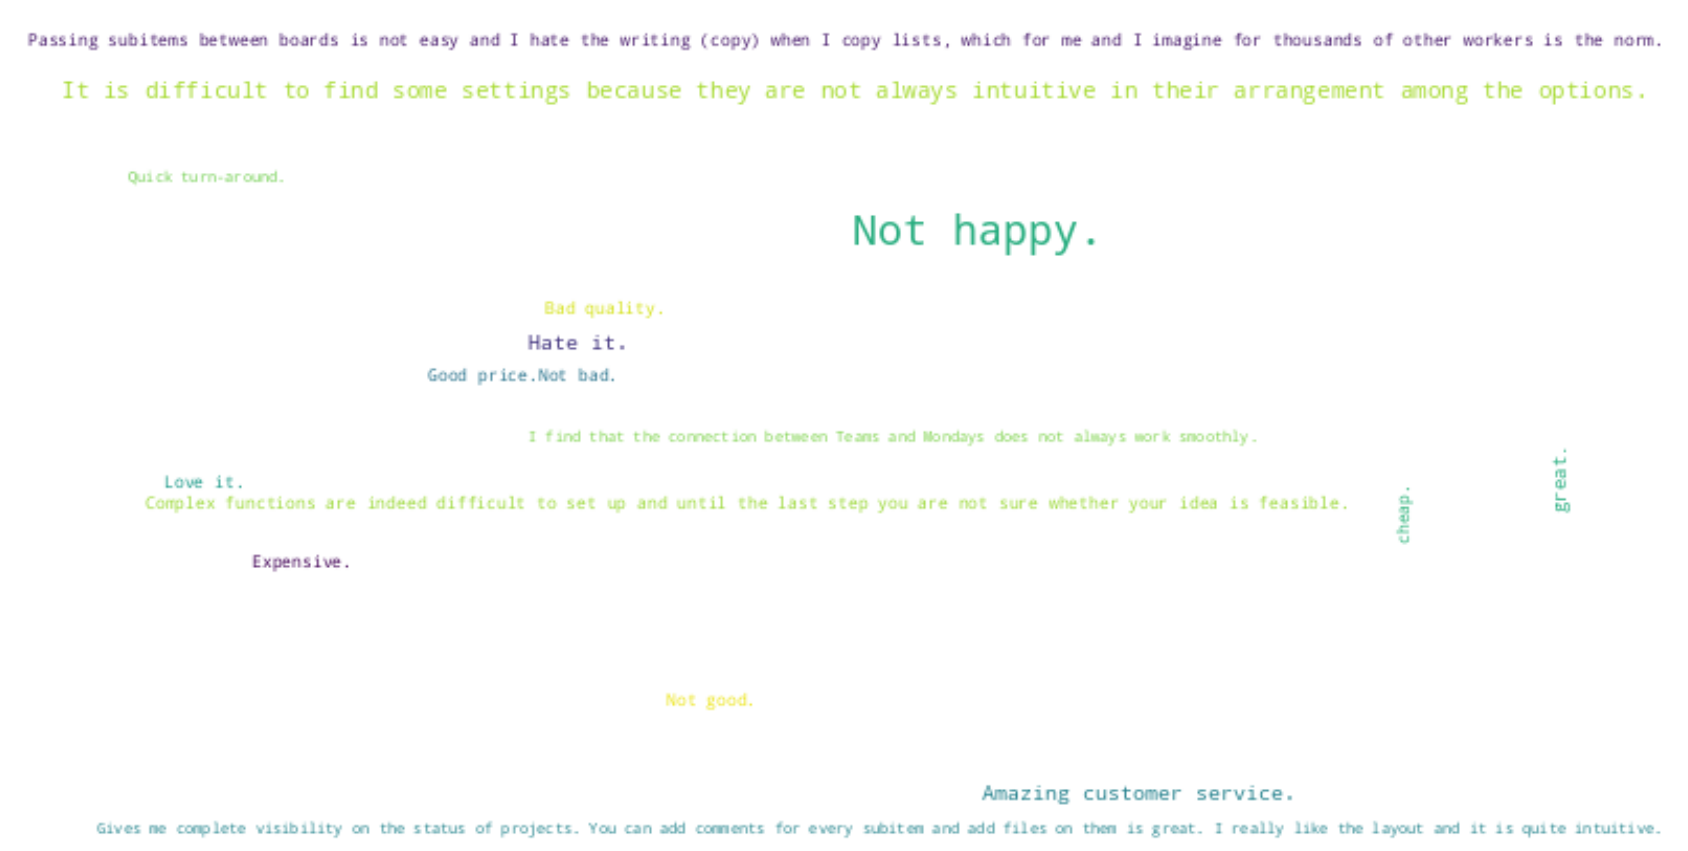

In [21]:
from wordcloud import WordCloud

# create a dictionary of word frequencies based on the subjectivity scores
word_freq = dict(zip(df['text'], df['subjectivity']))

# create a WordCloud object with the word frequencies
wc = WordCloud(width=800, height=400, background_color='white', max_words=50)

# generate the word cloud from the word frequencies
wc.generate_from_frequencies(word_freq)

# plot the word cloud
plt.figure(figsize=(30, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
